In [1]:
!pip install seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings as wr
import math
import scipy.stats as stats

# Sample Data Cleaning and Structuring

In [3]:
walmart=pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv")

In [4]:
walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [5]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
walmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
walmart.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No Null values in the given Dataset

In [8]:
walmart.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [9]:
for i in walmart.columns:
    print(i)
    print(walmart[i].value_counts())

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
Gender
M    414259
F    135809
Name: Gender, dtype: int64
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
City_Category
B    231173
C 

In [10]:
walmart['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [11]:
usercnt_data =walmart.copy()
usercnt_data['User_cnt'] = usercnt_data['User_ID'].map(usercnt_data['User_ID'].value_counts())
usercnt_data.sort_values(by='Purchase', ascending=False, inplace=True)

In [12]:
single_user_data = usercnt_data.drop_duplicates(subset='User_ID',keep='first')
single_user_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,User_cnt
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961,18
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961,74
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961,72
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960,115
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960,81
...,...,...,...,...,...,...,...,...,...,...,...
360811,1001562,P00156442,M,18-25,20,C,1,1,8,8086,17
480503,1001967,P00047542,M,51-55,7,B,4+,1,8,8080,16
30405,1004636,P00250242,M,18-25,2,B,2,1,5,7193,16
334901,1003598,P00047742,M,55+,1,A,2,0,16,4802,42


It sores only larger purchase they made with total number of purchases

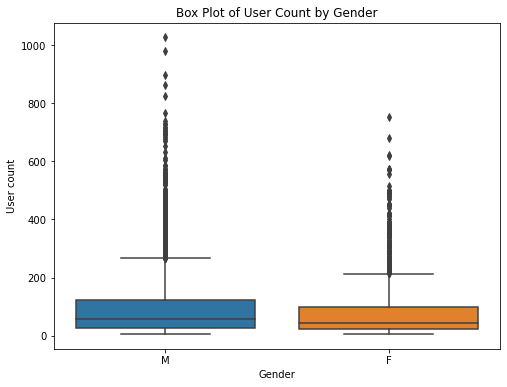

In [13]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
# Create the box plot using Seaborn
sns.boxplot(x='Gender', y='User_cnt', data=single_user_data)

plt.title('Box Plot of User Count by Gender')
plt.xlabel('Gender')
plt.ylabel('User count')

# Show the plot
plt.show()

Here the outliers are the frequent customers

In [14]:
single_user_data[single_user_data['User_cnt']>800].shape

(5, 11)

In our comprehensive dataset, the removal of rows associated with these frequent users and most infrequent allows us to focus our analysis on the more regular and frequent customers. By doing so, we gain valuable insights into the behaviors and preferences of our core customer base, which is instrumental in our efforts to expand our business. Analyzing this segment of customers who visit our stores more sporadically aids in identifying potential opportunities to enhance customer engagement and loyalty among those who may not visit as frequently

In [15]:
single_user_data[single_user_data['User_cnt']<9].shape

(18, 11)

In [16]:
usercnt_data[usercnt_data['User_cnt']<9]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,User_cnt
307490,1005391,P00255842,M,26-35,7,A,0,0,16,20647,7
37747,1005810,P00059442,M,51-55,16,C,4+,1,6,20134,7
419714,1004527,P00334242,M,18-25,0,C,4+,1,1,19567,8
469506,1000320,P00184942,M,36-45,6,C,4+,0,1,19537,8
95007,1002690,P00184942,M,26-35,7,C,3,1,1,19525,7
...,...,...,...,...,...,...,...,...,...,...,...
549908,1005810,P00370853,M,51-55,16,C,4+,1,19,61,7
548134,1003275,P00370293,M,36-45,7,B,2,0,19,60,8
549767,1005608,P00370853,M,18-25,3,C,1,0,19,48,7
548146,1003291,P00370853,F,26-35,7,B,4+,0,19,25,8


In [17]:
usercnt_data.drop(usercnt_data[usercnt_data['User_cnt']<9].index,inplace=True)
usercnt_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,User_cnt
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961,18
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961,74
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961,72
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960,115
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960,81
...,...,...,...,...,...,...,...,...,...,...,...
546379,1000671,P00370853,M,18-25,4,C,0,0,19,12,88
546185,1000391,P00370293,M,46-50,11,C,2,1,19,12,38
547032,1001649,P00370293,M,18-25,19,C,2,1,19,12,34
546181,1000387,P00370293,F,36-45,7,C,0,0,19,12,46


In [18]:
usercnt_data[usercnt_data['User_cnt']>800]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,User_cnt
356100,1000889,P00116142,M,46-50,20,A,1,0,10,23835,823
83368,1000889,P00087042,M,46-50,20,A,1,0,10,23795,823
166366,1001680,P00116142,M,26-35,20,A,3,1,10,23631,1026
534362,1004277,P00052842,M,36-45,16,A,0,0,10,23615,979
5494,1000889,P00086242,M,46-50,20,A,1,0,10,23595,823
...,...,...,...,...,...,...,...,...,...,...,...
199918,1000889,P00293442,M,46-50,20,A,1,0,13,200,823
5466,1000889,P00041442,M,46-50,20,A,1,0,13,186,823
548828,1004277,P00371644,M,36-45,16,A,0,0,20,126,979
546717,1001181,P00370293,M,36-45,7,A,3,1,19,62,862


In [19]:
usercnt_data.drop(usercnt_data[usercnt_data['User_cnt']>800].index,inplace=True)
usercnt_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,User_cnt
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961,18
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961,74
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961,72
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960,115
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960,81
...,...,...,...,...,...,...,...,...,...,...,...
546379,1000671,P00370853,M,18-25,4,C,0,0,19,12,88
546185,1000391,P00370293,M,46-50,11,C,2,1,19,12,38
547032,1001649,P00370293,M,18-25,19,C,2,1,19,12,34
546181,1000387,P00370293,F,36-45,7,C,0,0,19,12,46


In [20]:
single_user_data.drop(single_user_data[single_user_data['User_cnt'] > 800].index, inplace=True)

C:\Users\ajayk\AppData\Local\Temp\ipykernel_28564\1260030388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_user_data.drop(single_user_data[single_user_data['User_cnt'] > 800].index, inplace=True)


In [21]:
single_user_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,User_cnt
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961,18
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961,74
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961,72
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960,115
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960,81
...,...,...,...,...,...,...,...,...,...,...,...
360811,1001562,P00156442,M,18-25,20,C,1,1,8,8086,17
480503,1001967,P00047542,M,51-55,7,B,4+,1,8,8080,16
30405,1004636,P00250242,M,18-25,2,B,2,1,5,7193,16
334901,1003598,P00047742,M,55+,1,A,2,0,16,4802,42


In [22]:
productcnt_data = walmart.copy()
productcnt_data['Pr_cnt'] = productcnt_data['Product_ID'].map(productcnt_data['Product_ID'].value_counts())
productcnt_data.sort_values(by='Purchase', ascending=False, inplace=True)


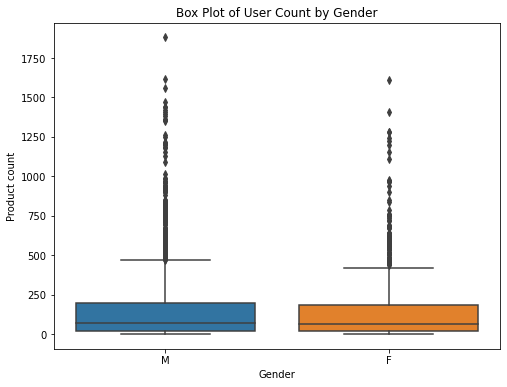

In [23]:
single_product_data = productcnt_data.drop_duplicates(subset='Product_ID')

plt.figure(figsize=(8, 6))  # Set the figure size (optional)
# Create the box plot using Seaborn
sns.boxplot(x='Gender', y='Pr_cnt', data=single_product_data)

plt.title('Box Plot of User Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Product count')

# Show the plot
plt.show()

In [24]:
single_product_data[single_product_data['Pr_cnt']>1200]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Pr_cnt
54201,1002247,P00255842,M,46-50,2,B,2,1,16,20971,1383
383577,1005015,P00148642,M,36-45,6,B,2,1,6,20690,1204
462450,1005208,P00059442,M,26-35,4,A,1,1,6,20690,1406
164847,1001451,P00057642,M,36-45,20,B,0,0,1,19708,1470
135822,1002993,P00010742,M,18-25,19,C,1,1,1,19708,1350
344941,1005087,P00110742,F,26-35,6,B,1,1,1,19708,1612
48495,1001437,P00110942,M,51-55,3,C,4+,0,1,19708,1360
177190,1003437,P00110842,F,26-35,0,C,2,1,1,19708,1281
202782,1001289,P00080342,M,46-50,6,C,0,0,1,19708,1203
211446,1002641,P00237542,M,26-35,6,C,1,1,1,19708,1394


These high-demand products are crucial candidates for inclusion in our cart, ensuring their availability to cater to the preferences of our customers.

In [25]:
single_product_data[single_product_data['Pr_cnt']<=2]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Pr_cnt
108253,1004647,P00272342,M,36-45,20,B,1,1,7,20889,2
96387,1002930,P00162142,M,51-55,17,C,1,1,7,20859,2
233084,1005949,P00201842,M,18-25,17,B,3,1,7,20481,2
173592,1002872,P00074542,M,26-35,20,B,1,0,7,20323,1
424219,1005313,P00341542,M,55+,0,A,3,0,6,20291,1
...,...,...,...,...,...,...,...,...,...,...,...
302092,1004486,P00341042,M,36-45,8,C,1,0,11,1632,2
450883,1003476,P00353042,M,51-55,0,B,2,1,11,1545,1
395304,1000873,P00272742,M,55+,6,C,3,1,12,1430,2
107892,1004579,P00309042,F,18-25,4,B,1,1,12,726,1


In [26]:
single_product_data.drop(single_product_data[single_product_data['Pr_cnt']<=2].index,inplace=True)
single_product_data

C:\Users\ajayk\AppData\Local\Temp\ipykernel_28564\474718903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_product_data.drop(single_product_data[single_product_data['Pr_cnt']<=2].index,inplace=True)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Pr_cnt
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961,982
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960,395
349658,1005848,P00119342,M,51-55,20,A,0,1,10,23960,308
298378,1003947,P00116142,M,26-35,0,C,3,0,10,23959,642
437804,1001387,P00086242,F,51-55,13,B,1,1,10,23959,273
...,...,...,...,...,...,...,...,...,...,...,...
547341,1002113,P00372445,M,26-35,6,C,1,0,20,613,837
549694,1005500,P00371644,F,36-45,20,B,1,0,20,613,899
166401,1001685,P00063242,M,36-45,12,B,1,0,13,573,5
547165,1001852,P00370853,M,26-35,12,B,1,0,19,62,818


In [27]:
productcnt_data.drop(productcnt_data[productcnt_data['Pr_cnt']<=2].index,inplace=True)
productcnt_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Pr_cnt
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961,982
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961,982
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961,982
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960,395
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960,982
...,...,...,...,...,...,...,...,...,...,...,...
546379,1000671,P00370853,M,18-25,4,C,0,0,19,12,818
546185,1000391,P00370293,M,46-50,11,C,2,1,19,12,785
547032,1001649,P00370293,M,18-25,19,C,2,1,19,12,785
546181,1000387,P00370293,F,36-45,7,C,0,0,19,12,785


In [28]:
## handileng the outliers from purchase column
q1 = walmart['Purchase'].quantile(0.25)
q3 = walmart['Purchase'].quantile(0.75)
iqr = q3 - q1
lower =  q1 - 1.5 * iqr
upper = q3 + 1.5 *iqr

In [29]:
clean_walmart = walmart[(walmart['Purchase'] >= lower) & (walmart['Purchase']<=upper) ]

In [30]:
clean_walmart.drop(['User_ID','Product_ID'],axis=1,inplace=True)

C:\Users\ajayk\AppData\Local\Temp\ipykernel_28564\1641633723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_walmart.drop(['User_ID','Product_ID'],axis=1,inplace=True)


In [31]:
clean_walmart

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,368
550064,F,26-35,1,C,3,0,20,371
550065,F,26-35,15,B,4+,1,20,137
550066,F,55+,1,C,2,0,20,365


# Sample Analysis

In [32]:
walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [33]:
walmart['Purchase'].mean()-walmart['Purchase'].median()

1216.9687129591257

In [34]:
walmart['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


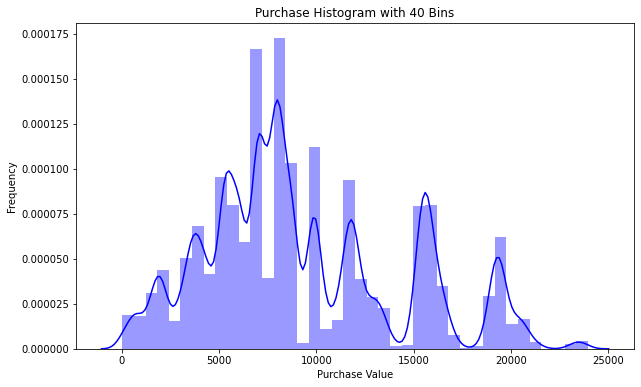

In [35]:
num_bins = 40

plt.figure(figsize=(10, 6))
sns.distplot(walmart['Purchase'], bins=num_bins, kde=True, color='blue')

plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.title(f'Purchase Histogram with {num_bins} Bins')
plt.show()

In [36]:
walmart['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [37]:
mean_purchase_male = walmart.loc[walmart['Gender'] == 'M', 'Purchase'].mean()
mean_purchase_female = walmart.loc[walmart['Gender'] == 'F', 'Purchase'].mean()
mean_purchase_male,mean_purchase_female

(9437.526040472265, 8734.565765155476)

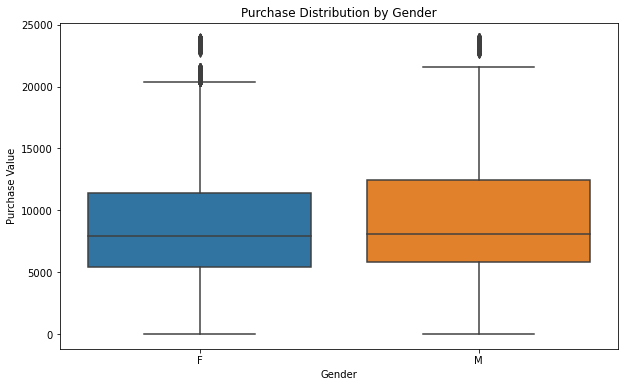

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=walmart)
plt.xlabel('Gender')
plt.ylabel('Purchase Value')
plt.title('Purchase Distribution by Gender')
plt.show()

In [39]:
walmart[walmart['Purchase']>20000]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
213,1000036,P00288642,M,26-35,3,B,0,0,16,20442
234,1000043,P00255842,M,26-35,12,A,0,0,16,20961
324,1000053,P00109242,M,26-35,0,B,1,0,6,20529
330,1000053,P00145942,M,26-35,0,B,1,0,6,20474
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
...,...,...,...,...,...,...,...,...,...,...
545664,1006002,P00071442,M,51-55,0,C,1,1,15,21310
545787,1006018,P00052842,M,36-45,1,C,3,0,10,23496
545834,1006029,P00327342,F,26-35,1,C,1,1,16,20616
545856,1006036,P00279742,F,26-35,15,B,4+,1,16,20766


Nearly 2 percent of data are outliers they cant be removed

In [40]:
walmart.loc[walmart['Gender'] == 'F', 'Purchase'].mode(),walmart.loc[walmart['Gender'] == 'M', 'Purchase'].mode()

(0    7108
 Name: Purchase, dtype: int64,
 0    6855
 Name: Purchase, dtype: int64)

Although females, on average, make purchases with a lower mean value, it's worth noting that their purchase behavior exhibits a higher mode value than male.

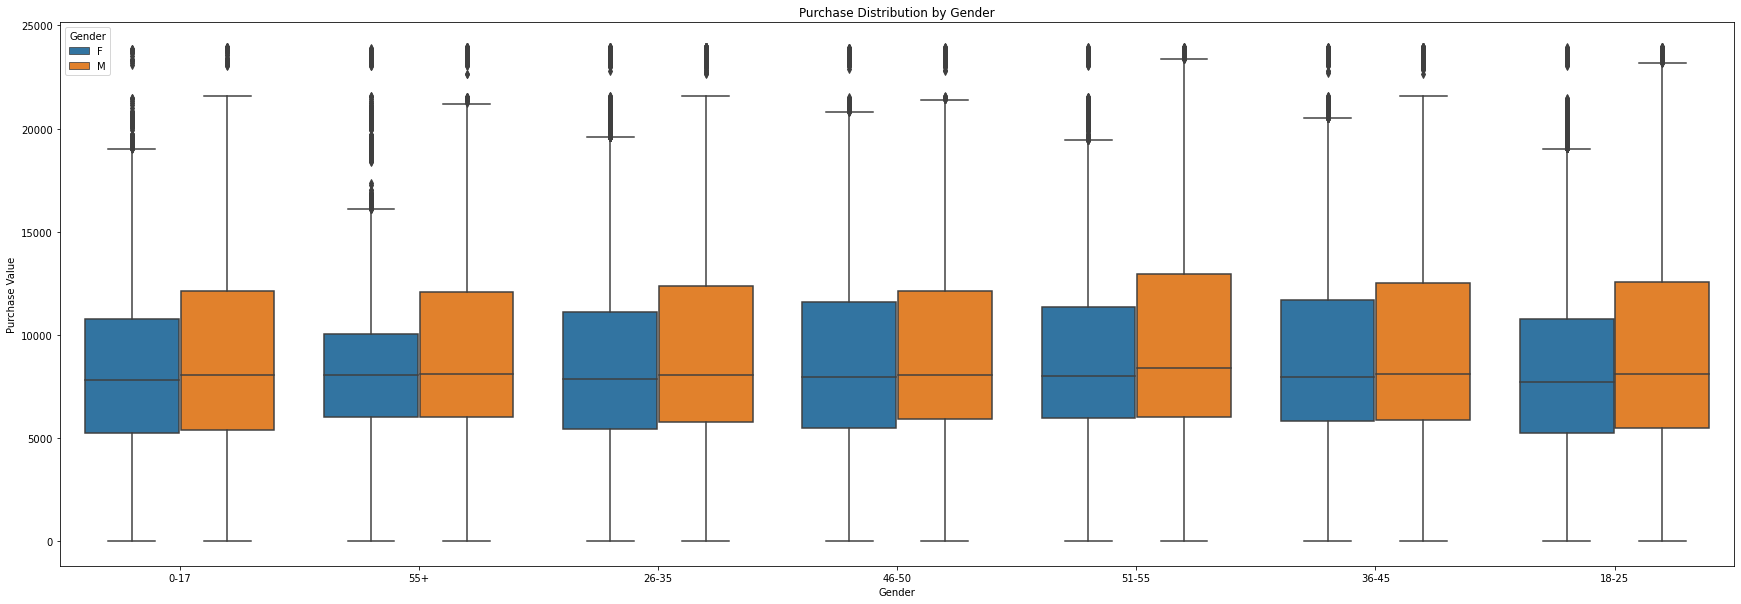

In [41]:
plt.figure(figsize=(30, 10))
sns.boxplot(x='Age', y='Purchase', data=walmart,hue='Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Value')
plt.title('Purchase Distribution by Gender')

plt.show()

In every age group male has dominated female but when comes to outliers both have almost equal values But for 46 to 50 age group female are having nearly equal purchases comparing male

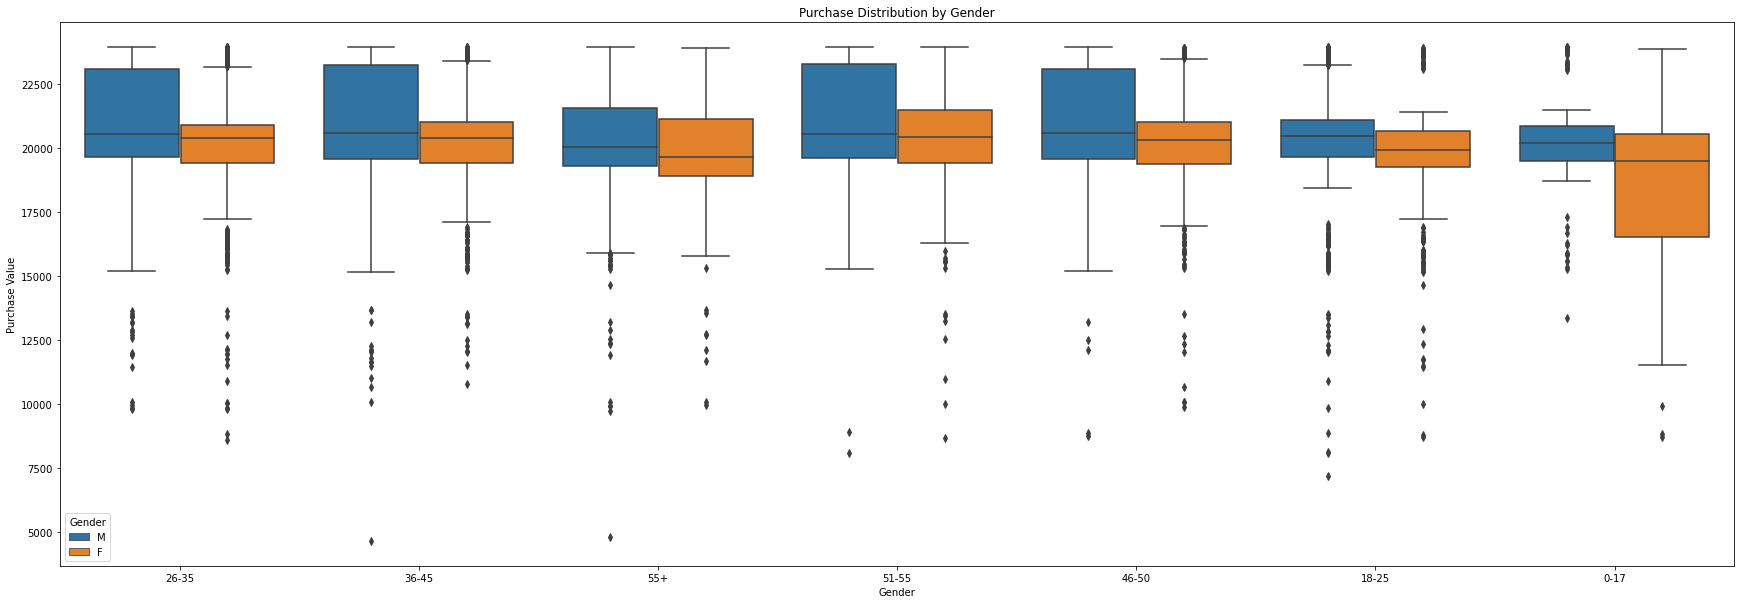

In [42]:
plt.figure(figsize=(30, 10))
sns.boxplot(x='Age', y='Purchase', data=single_user_data,hue='Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Value')
plt.title('Purchase Distribution by Gender')
plt.show()
#single use data contains user only one thime with their max purchase value

Interestingly, it's worth noting that females in the age group of 0 to 17 tend to make their maximum purchases within the range of 16,000 to 22,000, especially when there are significant offers available. On average, their purchases fall between 5,000 to 13,000. This suggests that they tend to make larger and more substantial purchases when compelling discounts or promotions are available.In all other age groups male dominated as they are double the females .
For 46 to 50 age group male have higher max purchase but they have almost equalshare when compared to female overall.

# Estimation For Population Using Sample

###### Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

since sample size >30 it follows normal distribution so we can use ztest and mormal distribution scenarios

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

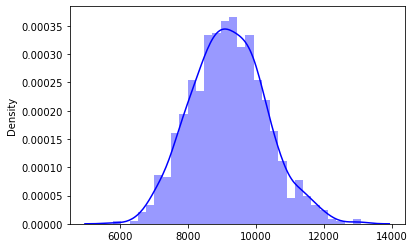

In [43]:
num_samples=20
collected_sample_means=[]
for sample in range(1000):
    sample_mean=clean_walmart["Purchase"].sample(num_samples).mean()
    collected_sample_means.append(sample_mean)
sns.distplot(collected_sample_means, bins=30, kde=True, color='blue')

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

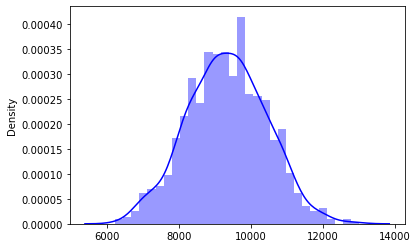

In [44]:
num_samples=20
collected_sample_means=[]
for sample in range(1000):
    sample_mean=clean_walmart.loc[clean_walmart['Gender'] == 'M', ['Purchase']]['Purchase'].sample(num_samples).mean()
    collected_sample_means.append(sample_mean)
sns.distplot(collected_sample_means, bins=30, kde=True, color='blue')

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

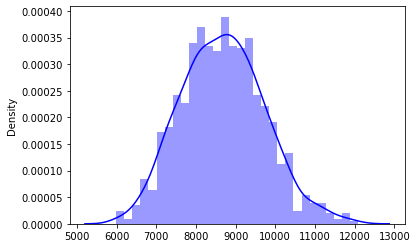

In [45]:
num_samples=20
collected_sample_means=[]
for sample in range(1000):
    sample_mean=clean_walmart.loc[clean_walmart['Gender'] == 'F', ['Purchase']]['Purchase'].sample(num_samples).mean()
    collected_sample_means.append(sample_mean)
sns.distplot(collected_sample_means, bins=30, kde=True, color='blue')

In [57]:
s=300
iterations=1000
total_spends=[clean_walmart.sample(s, replace=True)['Purchase'].mean() for i in range(iterations)]
male_spends=[clean_walmart[clean_walmart['Gender']=='M'].sample(s, replace=True)['Purchase'].mean() for i in range(iterations)]
female_spends=[clean_walmart[clean_walmart['Gender']=='F'].sample(s, replace=True)['Purchase'].mean() for i in range(iterations)]

In [58]:
#95% confidence interval

## Male vs Female

In [59]:
male_upper_limit=np.mean(male_spends)+1.96*np.std(male_spends)
male_lower_limit=np.mean(male_spends)-1.96*np.std(male_spends)
male_lower_limit,male_upper_limit

(8816.112617098832, 9898.6538762345)

In [60]:
female_upper_limit=np.mean(female_spends)+1.96*np.std(female_spends)
female_lower_limit=np.mean(female_spends)-1.96*np.std(female_spends)
female_lower_limit,female_upper_limit

(8157.122805698476, 9225.949854301522)

In [61]:
total_spends_upper_limit=np.mean(total_spends)+1.96*np.std(total_spends)
total_spends_lower_limit=np.mean(total_spends)-1.96*np.std(total_spends)
total_spends_lower_limit,total_spends_upper_limit

(8642.939121124298, 9728.861078875703)

The confidence intervals of average male and female spends are not overlapping.Also the averagee male expenditure is more than female .

### Married VS Unmarried

In [64]:
s=300
iterations=1000

unmarried_spends=[clean_walmart[clean_walmart['Marital_Status'] == 0].sample(s, replace=True)['Purchase'].mean() for i in range(iterations)]

married_spends=[clean_walmart[clean_walmart['Marital_Status'] == 1].sample(s, replace=True)['Purchase'].mean() for i in range(iterations)]

In [66]:
married_upper_limit=np.mean(married_spends)+1.96*np.std(married_spends)
married_lower_limit=np.mean(married_spends)-1.96*np.std(married_spends)
married_lower_limit,married_upper_limit

(8639.359438839927, 9742.047087826739)

In [67]:
unmarried_upper_limit=np.mean(unmarried_spends)+1.96*np.std(unmarried_spends)
unmarried_lower_limit=np.mean(unmarried_spends)-1.96*np.std(unmarried_spends)
unmarried_lower_limit,unmarried_upper_limit

(8633.829138275105, 9768.536208391564)

The analysis reveals that there is very little variation in purchase behavior between married and unmarried customers.

we can also use percentile method for above proceess

In [74]:
married_CI= np.percentile(married_spends,[2.5, 97.5])

In [75]:
married_CI

array([8679.78341667, 9732.81725   ])